# Tiny Data Science Project

### Moscow Real Estate: How Real Estate Market Behaves In The First 3 Weeks of Crisis

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In this study, I am assigning the datasets as: 
- week 1: m1
- week 3: m2

In [3]:
m1 = pd.read_csv('moscow_real_estate_sale.csv')
m2 = pd.read_csv('moscow_real_estate_sale_2.csv')

/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_81690/2472452512.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  m1 = pd.read_csv('moscow_real_estate_sale.csv')
/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_81690/2472452512.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  m2 = pd.read_csv('moscow_real_estate_sale_2.csv')


In [4]:
print(m1.shape)
print(m2.shape)

(151560, 14)
(76385, 15)


# Cleaning the data <a class="anchor" id="first-bullet"></a>

In [5]:
m1.dtypes

Unnamed: 0       int64
metro           object
price            int64
minutes          int64
way             object
provider        object
fee_percent      int64
views            int64
storey           int64
storeys          int64
rooms           object
total_area       int64
living_area      int64
kitchen_area     int64
dtype: object

In [6]:
m2.dtypes

Unnamed: 0          int64
metro              object
price_mill_rub    float64
way                object
minutes             int64
views               int64
provider           object
fee_percent         int64
storey              int64
storeys             int64
rooms              object
total_area        float64
living_area       float64
kitchen_area      float64
type               object
dtype: object

From what we can see, we have 'rooms' column as obect, rather than number. We have to see what obseervations make it an object

In [7]:
m1.rooms.unique()

array(['3', '2', '1', '+', '5', '4', '6', '7', '8', '0', '9', 3, 1, 2, 4,
       8, 6, 5, 9, 7], dtype=object)

In [8]:
m2.rooms.unique()

array(['1', '3', '2', '+', '4', '5', '6', '7', '0', '8', '9', 2, 1, 3, 4,
       5, 9, 6, 7, 8], dtype=object)

We can see that some of the numbers are objects and '+' is not a number. We can remove '+' observatios from the datasets and change the type of column to number

In [9]:
m1 = m1[m1['rooms'] != '+']
m2 = m2[m2['rooms'] != '+']
m1['rooms'] = m1['rooms'].astype(int)
m2['rooms'] = m2['rooms'].astype(int)
print(m1.shape)
print(m2.shape)

(137418, 14)
(61112, 15)


In [10]:
m1.rooms.dtype

dtype('int64')

In [11]:
m2.rooms.dtype

dtype('int64')

In addtition to this, while checking for the dtypes of columns, there is one extra column in the second dataset, which is not present in the first one. We can remove it, as it is not relevant for the first dataset. In addition to this, we can remove the 'Unnamed: 0' from both datasets, which is the index. Also, I think we should remove duplicates, if they are present in the datasets.

In [12]:
m2 = m2.drop(['type'], axis=1)

In [13]:
m1 = m1.drop(['Unnamed: 0'], axis=1)
m2 = m2.drop(['Unnamed: 0'], axis=1)

In [14]:
m1 = m1.drop_duplicates()
m2 = m2.drop_duplicates()
print(m1.shape)
print(m2.shape)

(125351, 13)
(61112, 13)


We should check, if datasets have observations with Nan

In [15]:
m1.isna().sum()

metro           0
price           0
minutes         0
way             0
provider        0
fee_percent     0
views           0
storey          0
storeys         0
rooms           0
total_area      0
living_area     0
kitchen_area    0
dtype: int64

In [16]:
m2.isna().sum()

metro              0
price_mill_rub     0
way                0
minutes            0
views              0
provider           0
fee_percent        0
storey             0
storeys            0
rooms              0
total_area        30
living_area       30
kitchen_area      30
dtype: int64

The number of observations that have Nan is small, so we can remove them, instead of looking for the way to fill them in

In [17]:
m2 = m2.dropna()
m2.isna().sum()

metro             0
price_mill_rub    0
way               0
minutes           0
views             0
provider          0
fee_percent       0
storey            0
storeys           0
rooms             0
total_area        0
living_area       0
kitchen_area      0
dtype: int64

In [18]:
m1.head(5)

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,Tulskaia,21950000,10,transport,owner,0,760,3,5,3,71,56,9
1,Tulskaia,21950000,10,transport,owner,0,768,3,5,3,71,56,9
2,Outskirts,11036289,0,transport,agency,0,48,11,19,2,56,56,56
3,Outskirts,10233650,0,transport,agency,0,66,11,19,2,56,56,56
4,Outskirts,10197166,0,transport,agency,0,79,12,19,2,56,56,56


In [19]:
m2.head(5)

,metro,price_mill_rub,way,minutes,views,provider,fee_percent,storey,storeys,rooms,total_area,living_area,kitchen_area
0,Fonvizinskaia,9.90,walk,8,791,agency,0,1,5,1,3.0,19.0,6.0
1,Tulskaia,21.95,transport,10,897,owner,0,3,5,3,71.0,56.0,9.0
2,Outskirts,6.10,transport,0,487,realtor,0,2,5,2,35.0,21.0,11.0
3,Petrovskii park,12.50,transport,19,632,realtor,0,1,3,3,106.0,66.0,17.0
4,Outskirts,16.50,transport,0,1972,realtor,0,13,14,2,70.0,42.0,14.0


The price column is the most important column for the study and we can see that the price in the second dataset is in millions. It means, we should change the price column in the first dataset to millions.

In [20]:
m1['price'] = m1['price'] / 1000000
m2['price'] = m2['price_mill_rub']

In [21]:
m2 = m2.drop(['price_mill_rub'], axis=1)

In addtition to this, I have mentioned that I would also look at the changes in the provider market sizes. It means that I need to check if there is any bad data

In [22]:
m1.provider.unique()

array(['owner                 ', 'agency                 ',
       'realtor                \xa0 \xa0 ',
       'agency                \xa0 \xa0 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'owner                \xa0 \xa0 ', 'realtor                 ',
       'developer                 '], dtype=object)

In [23]:
m2.provider.unique()

array(['agency', 'owner', 'realtor', 'developer'], dtype=object)

In the first dataset, the data probably was not properly collected, as we can see extra symbols in the observations. We can replace them with cleaned observations.

In [24]:
m1['provider'] = m1['provider'].replace(['owner                 ','owner                \xa0 \xa0 '], 'owner')
m1['provider'] = m1['provider'].replace(['agency                 ','agency                \xa0 \xa0 ',
                                                    'agency                \xa0 \xa0\xa0 \xa0 '], 'agency')
m1['provider'] = m1['provider'].replace(['realtor                \xa0 \xa0 ','realtor                 '], 'realtor')
m1['provider'] = m1['provider'].replace(['developer                 '], 'developer')

In [25]:
m1.provider.unique()

array(['owner', 'agency', 'realtor', 'developer'], dtype=object)

In [26]:
m2.provider.unique()

array(['agency', 'owner', 'realtor', 'developer'], dtype=object)

In [90]:
m1 = m1.drop(['fee_percent'], axis=1)
m2 = m2.drop(['fee_percent'], axis=1)

## Comparing Providers <a class="anchor" id="second-bullet"></a>

In [105]:
m1_cat = m1.copy()
m2_cat = m2.copy()

In [106]:
m1_cat['walk'] = m1_cat['way']
m1_cat = m1_cat.drop(['way'], axis=1)
m2_cat['walk'] = m2_cat['way']
m2_cat = m2_cat.drop(['way'], axis=1)

In [107]:
m1_cat['provider'] = m1_cat['provider'].replace(['owner                 ',
                                                    'owner                \xa0 \xa0 '], 'owner')
m1_cat['provider'] = m1_cat['provider'].replace(['agency                 ',
                                                    'agency                \xa0 \xa0 ',
                                                    'agency                \xa0 \xa0\xa0 \xa0 '], 'agency')
m1_cat['provider'] = m1_cat['provider'].replace(['realtor                \xa0 \xa0 ',
                                                    'realtor                 '], 'realtor')
m1_cat['provider'] = m1_cat['provider'].replace(['developer                 '], 'developer')

In [108]:
m2_cat['provider'] = m2_cat['provider'].replace(['owner                 ',
                                                    'owner                \xa0 \xa0 '], 'owner')
m2_cat['provider'] = m2_cat['provider'].replace(['agency                 ',
                                                    'agency                \xa0 \xa0 ',
                                                    'agency                \xa0 \xa0\xa0 \xa0 '], 'agency')
m2_cat['provider'] = m2_cat['provider'].replace(['realtor                \xa0 \xa0 ',
                                                    'realtor                 '], 'realtor')
m2_cat['provider'] = m2_cat['provider'].replace(['developer                 '], 'developer')

In [114]:
m1_prov = m1_cat.groupby(['provider']).agg('count').reset_index()
m2_prov = m2_cat.groupby(['provider']).agg('count').reset_index()

In [115]:
m1_prov.head(5)

,provider,metro,price,minutes,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area,walk
0,agency,60386,60386,60386,60386,60386,60386,60386,60386,60386,60386,60386,60386
1,developer,58201,58201,58201,58201,58201,58201,58201,58201,58201,58201,58201,58201
2,owner,4835,4835,4835,4835,4835,4835,4835,4835,4835,4835,4835,4835
3,realtor,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929,1929


Visualising the provider data

([<matplotlib.patches.Wedge at 0x7fd6b1603280>,
 [Text(0.06308367931626083, 1.0981896236096584, 'agency'),
  Text(-0.24745613007969047, -1.0718047693894552, 'developer'),
  Text(1.0739967575528164, -0.2377624124331624, 'owner'),
  Text(1.0987147545222054, -0.05315908384472345, 'realtor')],
 [Text(0.034409279627051356, 0.5990125219689045, '48%'),
  Text(-0.13497607095255842, -0.5846207833033392, '46%'),
  Text(0.585816413210627, -0.12968858859990676, '4%'),
  Text(0.5992989570121119, -0.028995863915303694, '2%')])

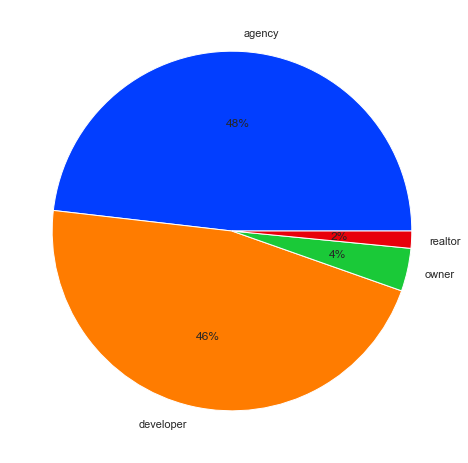

In [117]:
colors = sns.color_palette('bright')
plt.pie(m1_prov.metro, labels=m1_prov.provider, colors=colors, autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7fd6d113c3a0>,
 [Text(0.5671393440415169, 0.9425247818705661, 'agency'),
  Text(-0.7398002400567121, -0.8140611800178358, 'developer'),
  Text(1.047140289497428, -0.3368934759107732, 'owner'),
  Text(1.0926948890518695, -0.12656176136544098, 'realtor')],
 [Text(0.3093487331135546, 0.5141044264748542, '33%'),
  Text(-0.4035274036672975, -0.44403337091881945, '61%'),
  Text(0.5711674306349607, -0.18376007776951264, '3%'),
  Text(0.5960153940282924, -0.06903368801751325, '4%')])

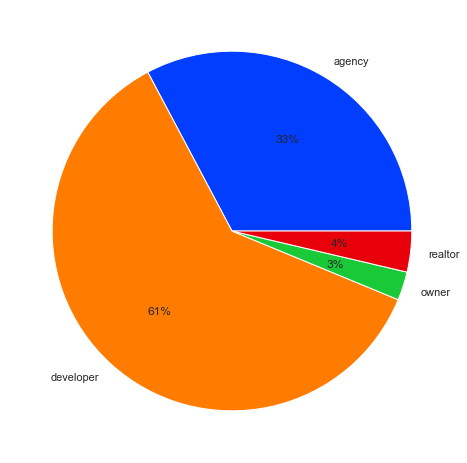

In [118]:
colors = sns.color_palette('bright')
plt.pie(m2_prov.metro, labels=m2_prov.provider, colors=colors, autopct='%.0f%%')

# Distributions for prices <a class="anchor" id="third-bullet"></a>

In [128]:
m2.head(5)

,metro,way,minutes,views,provider,fee_percent,storey,storeys,rooms,total_area,living_area,kitchen_area,price
0,Fonvizinskaia,walk,8,791,agency,0,1,5,1,3.0,19.0,6.0,9.90
1,Tulskaia,transport,10,897,owner,0,3,5,3,71.0,56.0,9.0,21.95
2,Outskirts,transport,0,487,realtor,0,2,5,2,35.0,21.0,11.0,6.10
3,Petrovskii park,transport,19,632,realtor,0,1,3,3,106.0,66.0,17.0,12.50
4,Outskirts,transport,0,1972,realtor,0,13,14,2,70.0,42.0,14.0,16.50


In [129]:
m1_dist_price = m1['price']
m2_dist_price = m2['price']

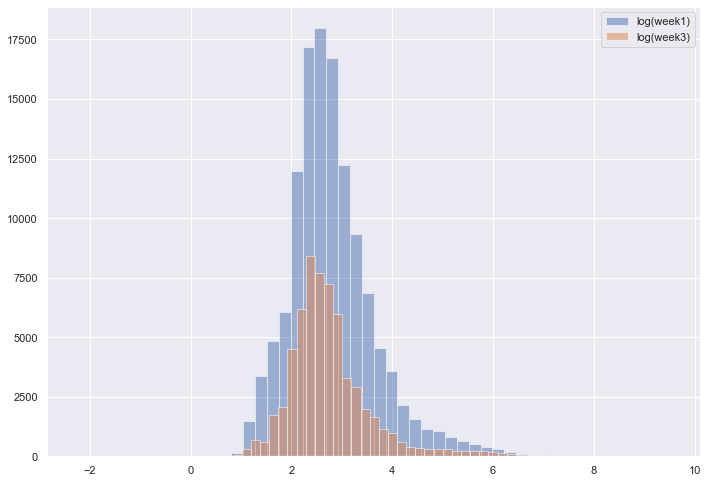

In [201]:
plt.hist(np.log(m1_dist_price), bins=50, alpha=0.5, label='log(week1)')
plt.hist(np.log(m2_dist_price), bins=50, alpha=0.5, label='log(week3)')
plt.legend(loc='upper right')
plt.show()

# Comparing providers in outskrits area

In [21]:
m1_outskirts = m1[m1['metro'] == 'Outskirts']
m2_outskirts = m2[m2['metro'] == 'Outskirts']

In [22]:
m1_outskirts = m1_outskirts.drop(['fee_percent'], axis=1)
m2_outskirts = m2_outskirts.drop(['fee_percent'], axis=1)

In [24]:
m2_outskirts.head(3)

,metro,way,minutes,views,provider,storey,storeys,rooms,total_area,living_area,kitchen_area,price
2,Outskirts,transport,0,487,realtor,2,5,2,35.0,21.0,11.0,6.100000
4,Outskirts,transport,0,1972,realtor,13,14,2,70.0,42.0,14.0,16.500000
931,Outskirts,walk,0,192,developer,26,37,2,3.0,19.0,6.0,35.289202


In [25]:
m2_outskirts.price.head(10)

2       6.100000
4      16.500000
931    35.289202
932    36.108358
933    36.516639
934    37.023926
935    37.367037
936    36.738117
937    36.570152
938    36.809689
Name: price, dtype: float64

In [26]:
m1_outskirts.price.max()

13650.0

In [27]:
m1_outskirts = m1_outskirts[m1_outskirts['price'] != 13650.0]

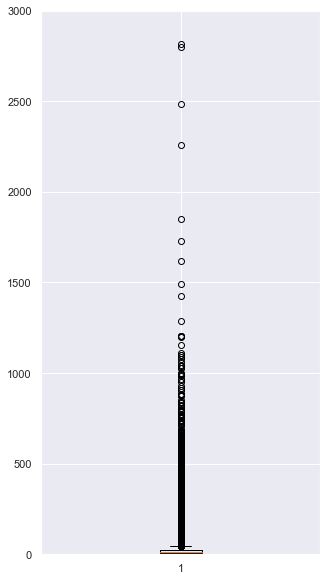

In [141]:
fig, ax = plt.subplots(figsize=(5,10))
plt.boxplot(m1_outskirts.price)
plt.ylim((0,3000))
plt.show()
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.boxplot(data=m1_outskirts, x='provider', y='price')

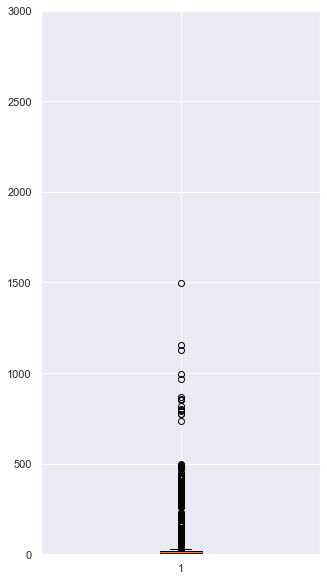

In [142]:
fig, ax = plt.subplots(figsize=(5,10))
plt.boxplot(m2_outskirts.price)
plt.ylim((0,3000))
plt.show()

# Distribution of outskirts prices

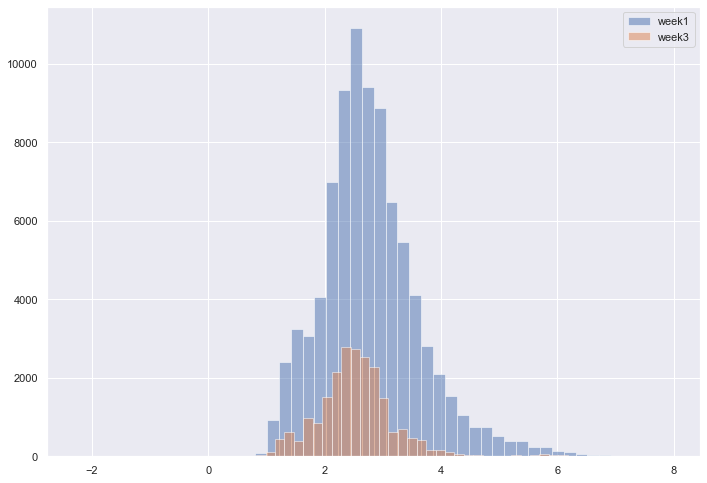

In [140]:
plt.hist(np.log(m1_outskirts.price), bins=50, alpha=0.5, label='week1')
plt.hist(np.log(m2_outskirts.price), bins=50, alpha=0.5, label='week3')
plt.legend(loc='upper right')
plt.show()

# The analysis of providers in outskirts

This is the section to answer my third question about the providers. And it is related to the question about the human bahavior

In [30]:
m1_outskirts['provider'] = m1_outskirts['provider'].replace(['owner                 ',
                                                    'owner                \xa0 \xa0 '], 'owner')
m1_outskirts['provider'] = m1_outskirts['provider'].replace(['agency                 ',
                                                    'agency                \xa0 \xa0 ',
                                                    'agency                \xa0 \xa0\xa0 \xa0 '], 'agency')
m1_outskirts['provider'] = m1_outskirts['provider'].replace(['realtor                \xa0 \xa0 ',
                                                    'realtor                 '], 'realtor')
m1_outskirts['provider'] = m1_outskirts['provider'].replace(['developer                 '], 'developer')

In [31]:
m2_outskirts['provider'] = m2_outskirts['provider'].replace(['owner                 ',
                                                    'owner                \xa0 \xa0 '], 'owner')
m2_outskirts['provider'] = m2_outskirts['provider'].replace(['agency                 ',
                                                    'agency                \xa0 \xa0 ',
                                                    'agency                \xa0 \xa0\xa0 \xa0 '], 'agency')
m2_outskirts['provider'] = m2_outskirts['provider'].replace(['realtor                \xa0 \xa0 ',
                                                    'realtor                 '], 'realtor')
m2_outskirts['provider'] = m2_outskirts['provider'].replace(['developer                 '], 'developer')

(0.0, 3000.0)

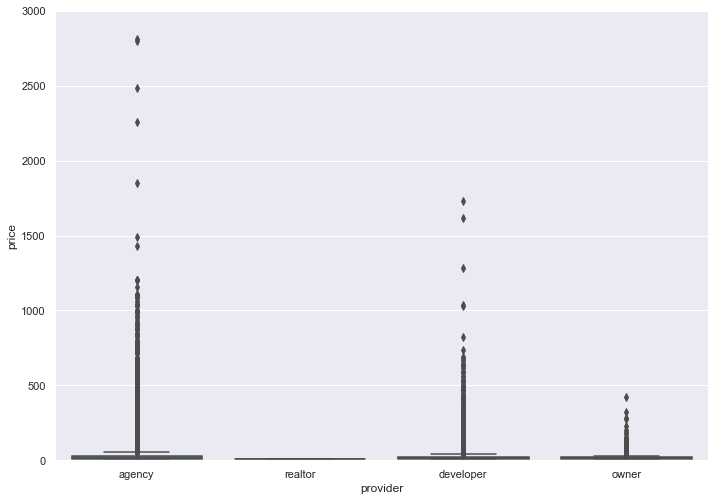

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=m1_outskirts, x='provider', y='price')
plt.ylim(0, 3000)

(0.0, 3000.0)

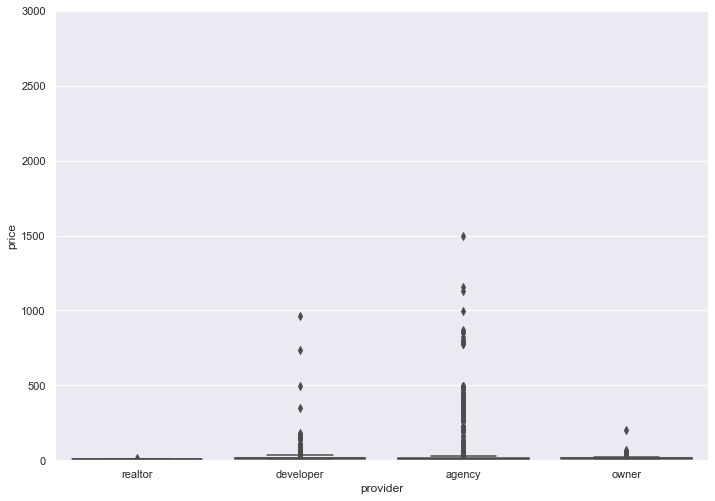

In [37]:
sns.boxplot(data=m2_outskirts, x='provider', y='price')
plt.ylim(0, 3000)

# Data Derivation <a class="anchor" id="4-bullet"></a>

By grouping the data, we can aggregate the data by area of Moscow, which will be used to build extra columns

In [33]:
m1_grouped = m1.groupby(['metro'])['price'].agg(['count','mean','median','std','sum']).reset_index()
m2_grouped = m2.groupby(['metro'])['price'].agg(['count','mean','median','std','sum']).reset_index()

In [34]:
m1_grouped.head(4)

,metro,count,mean,median,std,sum
0,Aeroport,82,37.153422,29.084307,29.964763,3046.580628
1,Akademicheskaia,104,25.853832,18.000000,22.178287,2688.798576
2,Alekseevskaia,195,30.244017,27.960752,16.499335,5897.583373
3,Alma-Atinskaia,41,13.352683,12.700000,4.006486,547.460000


We use the market size formula from the report to understand what area is more filled with offers

In [35]:
m1_grouped['market_size'] = m1_grouped['count'] / sum(m1_grouped['count']) * 100
m2_grouped['market_size'] = m2_grouped['count'] / sum(m2_grouped['count']) * 100

In [36]:
m1_grouped = m1_grouped.sort_values(by=['market_size'], ascending=False)
m2_grouped = m2_grouped.sort_values(by=['market_size'], ascending=False)

In [37]:
m1_grouped.head(10)

,metro,count,mean,median,std,sum,market_size
219,Outskirts,86194,26.809710,14.853935,71.578416,2.310836e+06,68.762116
143,Prokshino,4465,12.459902,11.856018,3.918601,5.563346e+04,3.561998
63,Kommunarka,2685,11.376026,10.855439,3.592955,3.054463e+04,2.141985
43,Filatov Lug,1430,10.354509,9.389985,16.745456,1.480695e+04,1.140797
45,Fili,1351,38.899880,39.300000,14.081889,5.255374e+04,1.077774
133,Piatnitckoe shosse,1312,7.080452,6.398238,3.122810,9.289553e+03,1.046661
120,Olkhovaia,1020,11.246514,9.995000,4.985063,1.147144e+04,0.813715
27,Bulvar Rokossovskogo,737,12.976732,11.930320,5.299602,9.563851e+03,0.587949
209,Vodnyi stadion,727,18.649382,17.000000,19.388497,1.355810e+04,0.579971
97,Michurinskii prospekt,703,32.660273,26.801856,22.081037,2.296017e+04,0.560825


In [38]:
m1_grouped.tail(10)

,metro,count,mean,median,std,sum,market_size
80,Kuznetckii most,10,220.973426,180.567760,180.366654,2209.734256,0.007978
22,Borovskoe shosse,10,15.145000,13.900000,5.525167,151.450000,0.007978
19,Bittcevskii park,9,14.622222,14.500000,5.045673,131.600000,0.007180
18,Biblioteka im. Lenina,9,279.141168,132.416352,378.345661,2512.270512,0.007180
126,Partizanskaia,9,14.733333,14.500000,4.807661,132.600000,0.007180
44,Filevskii park,8,13.813750,13.350000,4.349512,110.510000,0.006382
34,Chkalovskaia,8,18.155000,16.500000,8.708497,145.240000,0.006382
137,Ploshchad Revoliutcii,7,197.262747,252.794848,187.444841,1380.839232,0.005584
200,Ulitca Dmitrievskogo,4,9.708760,7.216970,8.515728,38.835040,0.003191
67,Kotelniki,2,15.850000,15.850000,1.343503,31.700000,0.001596


In [39]:
m2_grouped.head(10)

,metro,count,mean,median,std,sum,market_size
219,Outskirts,21850,17.945149,12.382625,39.347246,392101.508731,35.771586
143,Prokshino,4783,12.416863,11.775814,3.935075,59389.855635,7.830457
63,Kommunarka,2730,11.420606,10.902731,3.642934,31178.255346,4.469402
43,Filatov Lug,1710,10.877755,9.860681,15.584882,18600.961423,2.799515
45,Fili,1417,38.871533,38.318700,13.918517,55080.962435,2.319832
133,Piatnitckoe shosse,1282,7.142212,6.398723,3.213263,9156.316266,2.098818
120,Olkhovaia,990,11.653087,10.223825,5.166993,11536.556366,1.620772
97,Michurinskii prospekt,825,33.356525,27.191126,23.375117,27519.132934,1.350643
211,Volgogradskii prospekt,775,11.588913,9.185912,4.847852,8981.407862,1.268786
28,Buninskaia Alleia,702,10.646139,9.477712,5.178756,7473.589361,1.149275


In [40]:
m2_grouped.tail(10)

,metro,count,mean,median,std,sum,market_size
22,Borovskoe shosse,11,14.600000,13.500000,5.305893,160.600000,0.018009
217,Zhulebino,11,18.380000,16.700000,17.182538,202.180000,0.018009
19,Bittcevskii park,11,14.281818,13.700000,4.612064,157.099999,0.018009
18,Biblioteka im. Lenina,10,247.173126,121.558616,326.350358,2471.731264,0.016371
34,Chkalovskaia,9,18.248889,16.500000,8.150921,164.240000,0.014734
66,Kosino,9,11.076667,10.800000,2.764647,99.690000,0.014734
80,Kuznetckii most,8,374.482598,166.240376,521.023665,2995.860784,0.013097
137,Ploshchad Revoliutcii,7,125.228741,12.000000,150.956925,876.601184,0.011460
200,Ulitca Dmitrievskogo,5,12.468000,9.700000,6.087210,62.340000,0.008186
67,Kotelniki,4,12.177500,11.965000,4.332254,48.710000,0.006549


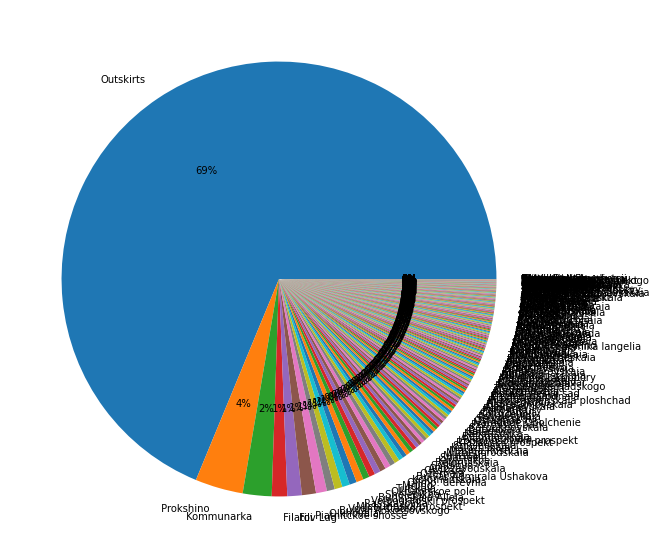

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

colors = sns.color_palette('bright')
plt.pie(m1_grouped.market_size, labels=m1_grouped.metro, autopct='%.0f%%')
plt.show()

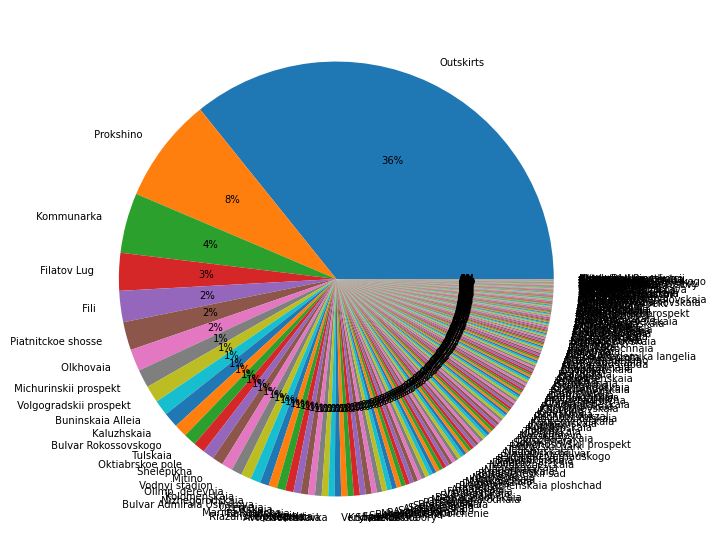

In [45]:
fig, ax = plt.subplots(figsize=(15,10))

colors = sns.color_palette('bright')
plt.pie(m2_grouped.market_size, labels=m2_grouped.metro, autopct='%.0f%%')
plt.show()

We use the market size formula from the report to understand what area has more market share than others

In [46]:
m1_grouped['market_share'] = m1_grouped['sum'] / sum(m1_grouped['sum']) * 100
m2_grouped['market_share'] = m2_grouped['sum'] / sum(m2_grouped['sum']) * 100

In [47]:
m1_grouped_share = m1_grouped.sort_values(by=['market_share'], ascending=False)
m2_grouped_share = m2_grouped.sort_values(by=['market_share'], ascending=False)

In [48]:
m1_grouped_share.head(10)

,metro,count,mean,median,std,sum,market_size,market_share
219,Outskirts,86194,26.809710,14.853935,71.578416,2.310836e+06,68.762116,63.687480
125,Park kultury,200,313.096171,249.712128,281.490412,6.261923e+04,0.159552,1.725809
143,Prokshino,4465,12.459902,11.856018,3.918601,5.563346e+04,3.561998,1.533278
45,Fili,1351,38.899880,39.300000,14.081889,5.255374e+04,1.077774,1.448400
169,Smolenskaia,273,181.465272,110.500000,183.455890,4.954002e+04,0.217788,1.365341
190,Tretiakovskaia,151,312.542833,253.000000,263.678424,4.719397e+04,0.120462,1.300683
11,Barrikadnaia,79,571.060660,120.000000,859.172199,4.511379e+04,0.063023,1.243352
74,Kropotkinskaia,148,281.719355,212.281192,233.069142,4.169446e+04,0.118068,1.149115
47,Frunzenskaia,164,252.320023,179.595000,266.428553,4.138048e+04,0.130833,1.140461
98,Minskaia,307,129.576181,88.000000,172.913822,3.977989e+04,0.244912,1.096348


In [49]:
m1_grouped_share.tail(10)

,metro,count,mean,median,std,sum,market_size,market_share
31,Cherkizovskaia,18,12.654200,12.40000,3.122193,227.77560,0.014360,0.006278
158,Semenovskaia,11,16.784545,16.50000,5.179738,184.63000,0.008775,0.005088
22,Borovskoe shosse,10,15.145000,13.90000,5.525167,151.45000,0.007978,0.004174
34,Chkalovskaia,8,18.155000,16.50000,8.708497,145.24000,0.006382,0.004003
126,Partizanskaia,9,14.733333,14.50000,4.807661,132.60000,0.007180,0.003655
19,Bittcevskii park,9,14.622222,14.50000,5.045673,131.60000,0.007180,0.003627
66,Kosino,11,10.900000,10.80000,2.614957,119.90000,0.008775,0.003304
44,Filevskii park,8,13.813750,13.35000,4.349512,110.51000,0.006382,0.003046
200,Ulitca Dmitrievskogo,4,9.708760,7.21697,8.515728,38.83504,0.003191,0.001070
67,Kotelniki,2,15.850000,15.85000,1.343503,31.70000,0.001596,0.000874


In [50]:
m2_grouped_share.head(10)

,metro,count,mean,median,std,sum,market_size,market_share
219,Outskirts,21850,17.945149,12.382625,39.347246,392101.508731,35.771586,22.668324
143,Prokshino,4783,12.416863,11.775814,3.935075,59389.855635,7.830457,3.433469
169,Smolenskaia,280,207.318640,123.000000,210.781037,58049.219223,0.458400,3.355964
125,Park kultury,194,298.745165,249.259920,273.752120,57956.561936,0.317606,3.350607
45,Fili,1417,38.871533,38.318700,13.918517,55080.962435,2.319832,3.184362
11,Barrikadnaia,84,619.343389,115.000000,928.013289,52024.844680,0.137520,3.007680
190,Tretiakovskaia,142,312.291144,266.705000,248.746341,44345.342512,0.232474,2.563710
98,Minskaia,324,136.852565,89.944752,205.679853,44340.230968,0.530434,2.563415
74,Kropotkinskaia,147,274.303366,220.000000,210.040633,40322.594760,0.240660,2.331145
47,Frunzenskaia,172,233.114664,175.000000,250.777573,40095.722280,0.281589,2.318029


In [51]:
m2_grouped_share.tail(10)

,metro,count,mean,median,std,sum,market_size,market_share
108,Novoiasenevskaia,17,11.262353,12.500,4.783394,191.460000,0.027831,0.011069
26,Bulvar Dmitriia Donskogo,14,13.184286,12.900,3.635169,184.580000,0.022920,0.010671
44,Filevskii park,12,14.559167,14.700,4.243212,174.710000,0.019646,0.010100
34,Chkalovskaia,9,18.248889,16.500,8.150921,164.240000,0.014734,0.009495
22,Borovskoe shosse,11,14.600000,13.500,5.305893,160.600000,0.018009,0.009285
19,Bittcevskii park,11,14.281818,13.700,4.612064,157.099999,0.018009,0.009082
126,Partizanskaia,12,12.064220,10.500,5.463409,144.770638,0.019646,0.008370
66,Kosino,9,11.076667,10.800,2.764647,99.690000,0.014734,0.005763
200,Ulitca Dmitrievskogo,5,12.468000,9.700,6.087210,62.340000,0.008186,0.003604
67,Kotelniki,4,12.177500,11.965,4.332254,48.710000,0.006549,0.002816


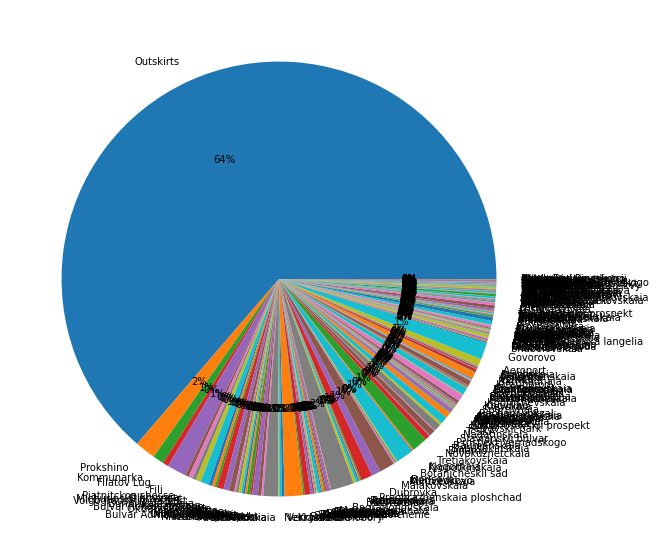

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

colors = sns.color_palette('bright')
plt.pie(m1_grouped.market_share, labels=m2_grouped.metro, autopct='%.0f%%')
plt.show()

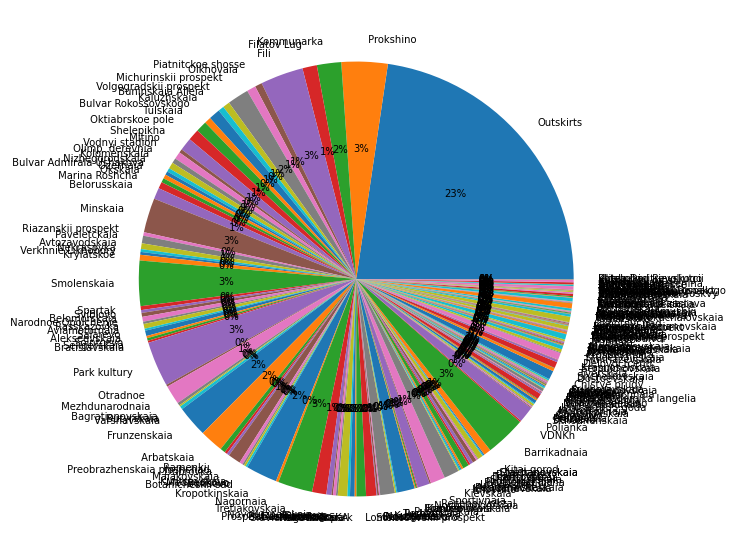

In [81]:
fig, ax = plt.subplots(figsize=(15,10))

colors = sns.color_palette('bright')
plt.pie(m2_grouped.market_share, labels=m2_grouped.metro, autopct='%.0f%%')
plt.show()

## Calculating the changes

In [54]:
m1_for_merge = m1_grouped_share.copy()
m2_for_merge = m2_grouped_share.copy()

In [55]:
merged = m1_for_merge.merge(m2_for_merge, how='left', on='metro', suffixes=('_week1', '_week3'))

Using the formula from the report to get the change between the datasets in market size

In [56]:
merged['change_ms'] = (merged['sum_week3'] - merged['sum_week1']) / merged['sum_week1'] * 100

In [57]:
merged = merged.sort_values(by='change_ms', ascending=False)

In [58]:
merged.head(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms
203,Borisovo,19,14.699368,14.800000,3.762241,279.288000,0.015157,0.007697,149,16.355842,15.500000,5.401968,2437.020402,0.243934,0.140890,772.583284
171,Varshavskaia,47,14.054532,13.500000,5.325677,660.562999,0.037495,0.018205,179,22.628814,23.152474,6.926346,4050.557728,0.293049,0.234172,513.197793
187,Ploshchad Ilicha,19,23.312026,17.900000,15.849808,442.928500,0.015157,0.012207,91,27.424495,24.834700,12.036005,2495.629039,0.148980,0.144278,463.438352
126,Teatralnaia,12,128.140833,97.500000,120.552103,1537.690000,0.009573,0.042379,14,291.134254,309.500000,192.640275,4075.879552,0.022920,0.235636,165.065101
142,Dubrovka,63,20.263539,18.800000,8.551945,1276.602927,0.050259,0.035184,165,20.188668,19.252035,6.763844,3331.130202,0.270129,0.192581,160.937064
111,Verkhnie Likhobory,143,12.979812,11.990000,4.040746,1856.113144,0.114080,0.051155,289,12.579893,10.977037,3.912462,3635.588939,0.473134,0.210182,95.871084
46,Kaluzhskaia,286,25.905353,24.775529,8.550686,7408.931049,0.228159,0.204193,685,21.138888,19.736040,9.156622,14480.138003,1.121443,0.837131,95.441662
152,Khoroshevskaia,44,24.035270,20.900000,14.927178,1057.551873,0.035101,0.029147,97,20.880048,18.330000,10.528599,2025.364700,0.158803,0.117091,91.514454
82,TcSKA,79,42.805236,35.900000,29.645473,3381.613668,0.063023,0.093198,133,45.042072,40.826636,25.551067,5990.595620,0.217740,0.346331,77.151982
218,Ulitca Dmitrievskogo,4,9.708760,7.216970,8.515728,38.835040,0.003191,0.001070,5,12.468000,9.700000,6.087210,62.340000,0.008186,0.003604,60.525134


In [59]:
merged.tail(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms
59,Taganskaia,42,140.369684,111.000000,124.431373,5.895527e+03,0.033506,0.162483,29,105.072812,102.000000,91.910965,3047.111536,0.047477,0.176161,-48.314855
143,Lesoparkovaia,90,14.116766,14.619970,2.843781,1.270509e+03,0.071798,0.035016,38,15.557845,14.878370,2.528640,591.198120,0.062211,0.034179,-53.467615
164,Rumiantcevo,88,9.141073,7.932065,2.616055,8.044144e+02,0.070203,0.022170,42,8.478166,8.294963,1.745849,356.082989,0.068760,0.020586,-55.733887
76,Tekhnopark,149,26.192889,24.808574,9.374192,3.902740e+03,0.118866,0.107561,61,27.242253,24.180820,12.475419,1661.777439,0.099866,0.096071,-57.420242
105,Okruzhnaia,205,10.859095,10.541700,4.485635,2.226114e+03,0.163541,0.061353,122,7.480004,6.875000,3.671594,912.560472,0.199732,0.052757,-59.006578
40,Rasskazovka,676,12.985112,12.502468,4.516543,8.777936e+03,0.539286,0.241923,236,12.418510,11.500000,6.159491,2930.768353,0.386366,0.169435,-66.612100
123,Vladykino,117,13.380511,12.499200,3.897566,1.565520e+03,0.093338,0.043146,41,12.056718,12.900000,4.886616,494.325457,0.067123,0.028578,-68.424195
41,Serpukhovskaia,234,36.882725,27.781863,35.402282,8.630558e+03,0.186676,0.237861,50,51.915490,28.404000,63.151594,2595.774480,0.081857,0.150068,-69.923444
154,Volokolamskaia,60,17.288030,17.007536,7.946072,1.037282e+03,0.047866,0.028588,14,18.014286,14.900000,12.954446,252.200000,0.022920,0.014580,-75.686453
0,Outskirts,86194,26.809710,14.853935,71.578416,2.310836e+06,68.762116,63.687480,21850,17.945149,12.382625,39.347246,392101.508731,35.771586,22.668324,-83.032050


Using the formula from the report to get the change between the datasets in market share

In [60]:
merged['change_market_share'] = (merged['market_share_week3'] - merged['market_share_week1']) / merged['market_share_week1'] * 100

In [61]:
merged.head(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms,change_market_share
203,Borisovo,19,14.699368,14.800000,3.762241,279.288000,0.015157,0.007697,149,16.355842,15.500000,5.401968,2437.020402,0.243934,0.140890,772.583284,1730.386763
171,Varshavskaia,47,14.054532,13.500000,5.325677,660.562999,0.037495,0.018205,179,22.628814,23.152474,6.926346,4050.557728,0.293049,0.234172,513.197793,1186.283090
187,Ploshchad Ilicha,19,23.312026,17.900000,15.849808,442.928500,0.015157,0.012207,91,27.424495,24.834700,12.036005,2495.629039,0.148980,0.144278,463.438352,1081.904489
126,Teatralnaia,12,128.140833,97.500000,120.552103,1537.690000,0.009573,0.042379,14,291.134254,309.500000,192.640275,4075.879552,0.022920,0.235636,165.065101,456.017587
142,Dubrovka,63,20.263539,18.800000,8.551945,1276.602927,0.050259,0.035184,165,20.188668,19.252035,6.763844,3331.130202,0.270129,0.192581,160.937064,447.358352
111,Verkhnie Likhobory,143,12.979812,11.990000,4.040746,1856.113144,0.114080,0.051155,289,12.579893,10.977037,3.912462,3635.588939,0.473134,0.210182,95.871084,310.871772
46,Kaluzhskaia,286,25.905353,24.775529,8.550686,7408.931049,0.228159,0.204193,685,21.138888,19.736040,9.156622,14480.138003,1.121443,0.837131,95.441662,309.970989
152,Khoroshevskaia,44,24.035270,20.900000,14.927178,1057.551873,0.035101,0.029147,97,20.880048,18.330000,10.528599,2025.364700,0.158803,0.117091,91.514454,301.733025
82,TcSKA,79,42.805236,35.900000,29.645473,3381.613668,0.063023,0.093198,133,45.042072,40.826636,25.551067,5990.595620,0.217740,0.346331,77.151982,271.605379
218,Ulitca Dmitrievskogo,4,9.708760,7.216970,8.515728,38.835040,0.003191,0.001070,5,12.468000,9.700000,6.087210,62.340000,0.008186,0.003604,60.525134,236.727835


In [62]:
merged.tail(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms,change_market_share
59,Taganskaia,42,140.369684,111.000000,124.431373,5.895527e+03,0.033506,0.162483,29,105.072812,102.000000,91.910965,3047.111536,0.047477,0.176161,-48.314855,8.418081
143,Lesoparkovaia,90,14.116766,14.619970,2.843781,1.270509e+03,0.071798,0.035016,38,15.557845,14.878370,2.528640,591.198120,0.062211,0.034179,-53.467615,-2.390680
164,Rumiantcevo,88,9.141073,7.932065,2.616055,8.044144e+02,0.070203,0.022170,42,8.478166,8.294963,1.745849,356.082989,0.068760,0.020586,-55.733887,-7.144557
76,Tekhnopark,149,26.192889,24.808574,9.374192,3.902740e+03,0.118866,0.107561,61,27.242253,24.180820,12.475419,1661.777439,0.099866,0.096071,-57.420242,-10.681964
105,Okruzhnaia,205,10.859095,10.541700,4.485635,2.226114e+03,0.163541,0.061353,122,7.480004,6.875000,3.671594,912.560472,0.199732,0.052757,-59.006578,-14.009563
40,Rasskazovka,676,12.985112,12.502468,4.516543,8.777936e+03,0.539286,0.241923,236,12.418510,11.500000,6.159491,2930.768353,0.386366,0.169435,-66.612100,-29.963396
123,Vladykino,117,13.380511,12.499200,3.897566,1.565520e+03,0.093338,0.043146,41,12.056718,12.900000,4.886616,494.325457,0.067123,0.028578,-68.424195,-33.764564
41,Serpukhovskaia,234,36.882725,27.781863,35.402282,8.630558e+03,0.186676,0.237861,50,51.915490,28.404000,63.151594,2595.774480,0.081857,0.150068,-69.923444,-36.909484
154,Volokolamskaia,60,17.288030,17.007536,7.946072,1.037282e+03,0.047866,0.028588,14,18.014286,14.900000,12.954446,252.200000,0.022920,0.014580,-75.686453,-48.998342
0,Outskirts,86194,26.809710,14.853935,71.578416,2.310836e+06,68.762116,63.687480,21850,17.945149,12.382625,39.347246,392101.508731,35.771586,22.668324,-83.032050,-64.406938


In [63]:
merged_mark_share = merged.copy()

In [66]:
merged_mark_share.sort_values(by='change_market_share', ascending=False);

In [67]:
merged_mark_share.head(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms,change_market_share
203,Borisovo,19,14.699368,14.800000,3.762241,279.288000,0.015157,0.007697,149,16.355842,15.500000,5.401968,2437.020402,0.243934,0.140890,772.583284,1730.386763
171,Varshavskaia,47,14.054532,13.500000,5.325677,660.562999,0.037495,0.018205,179,22.628814,23.152474,6.926346,4050.557728,0.293049,0.234172,513.197793,1186.283090
187,Ploshchad Ilicha,19,23.312026,17.900000,15.849808,442.928500,0.015157,0.012207,91,27.424495,24.834700,12.036005,2495.629039,0.148980,0.144278,463.438352,1081.904489
126,Teatralnaia,12,128.140833,97.500000,120.552103,1537.690000,0.009573,0.042379,14,291.134254,309.500000,192.640275,4075.879552,0.022920,0.235636,165.065101,456.017587
142,Dubrovka,63,20.263539,18.800000,8.551945,1276.602927,0.050259,0.035184,165,20.188668,19.252035,6.763844,3331.130202,0.270129,0.192581,160.937064,447.358352
111,Verkhnie Likhobory,143,12.979812,11.990000,4.040746,1856.113144,0.114080,0.051155,289,12.579893,10.977037,3.912462,3635.588939,0.473134,0.210182,95.871084,310.871772
46,Kaluzhskaia,286,25.905353,24.775529,8.550686,7408.931049,0.228159,0.204193,685,21.138888,19.736040,9.156622,14480.138003,1.121443,0.837131,95.441662,309.970989
152,Khoroshevskaia,44,24.035270,20.900000,14.927178,1057.551873,0.035101,0.029147,97,20.880048,18.330000,10.528599,2025.364700,0.158803,0.117091,91.514454,301.733025
82,TcSKA,79,42.805236,35.900000,29.645473,3381.613668,0.063023,0.093198,133,45.042072,40.826636,25.551067,5990.595620,0.217740,0.346331,77.151982,271.605379
218,Ulitca Dmitrievskogo,4,9.708760,7.216970,8.515728,38.835040,0.003191,0.001070,5,12.468000,9.700000,6.087210,62.340000,0.008186,0.003604,60.525134,236.727835


In [68]:
merged_mark_share.tail(10)

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms,change_market_share
59,Taganskaia,42,140.369684,111.000000,124.431373,5.895527e+03,0.033506,0.162483,29,105.072812,102.000000,91.910965,3047.111536,0.047477,0.176161,-48.314855,8.418081
143,Lesoparkovaia,90,14.116766,14.619970,2.843781,1.270509e+03,0.071798,0.035016,38,15.557845,14.878370,2.528640,591.198120,0.062211,0.034179,-53.467615,-2.390680
164,Rumiantcevo,88,9.141073,7.932065,2.616055,8.044144e+02,0.070203,0.022170,42,8.478166,8.294963,1.745849,356.082989,0.068760,0.020586,-55.733887,-7.144557
76,Tekhnopark,149,26.192889,24.808574,9.374192,3.902740e+03,0.118866,0.107561,61,27.242253,24.180820,12.475419,1661.777439,0.099866,0.096071,-57.420242,-10.681964
105,Okruzhnaia,205,10.859095,10.541700,4.485635,2.226114e+03,0.163541,0.061353,122,7.480004,6.875000,3.671594,912.560472,0.199732,0.052757,-59.006578,-14.009563
40,Rasskazovka,676,12.985112,12.502468,4.516543,8.777936e+03,0.539286,0.241923,236,12.418510,11.500000,6.159491,2930.768353,0.386366,0.169435,-66.612100,-29.963396
123,Vladykino,117,13.380511,12.499200,3.897566,1.565520e+03,0.093338,0.043146,41,12.056718,12.900000,4.886616,494.325457,0.067123,0.028578,-68.424195,-33.764564
41,Serpukhovskaia,234,36.882725,27.781863,35.402282,8.630558e+03,0.186676,0.237861,50,51.915490,28.404000,63.151594,2595.774480,0.081857,0.150068,-69.923444,-36.909484
154,Volokolamskaia,60,17.288030,17.007536,7.946072,1.037282e+03,0.047866,0.028588,14,18.014286,14.900000,12.954446,252.200000,0.022920,0.014580,-75.686453,-48.998342
0,Outskirts,86194,26.809710,14.853935,71.578416,2.310836e+06,68.762116,63.687480,21850,17.945149,12.382625,39.347246,392101.508731,35.771586,22.668324,-83.032050,-64.406938


# Checking the areas with bigger market share

In [79]:
merged_mark_share[merged_mark_share['metro'].isin([' Prokshino ',' Kommunarka ',' Barrikadnaia ',' Smolenskaia '])]

,metro,count_week1,mean_week1,median_week1,std_week1,sum_week1,market_size_week1,market_share_week1,count_week3,mean_week3,median_week3,std_week3,sum_week3,market_size_week3,market_share_week3,change_ms,change_market_share
4,Smolenskaia,273,181.465272,110.500000,183.455890,49540.019392,0.217788,1.365341,280,207.318640,123.000000,210.781037,58049.219223,0.458400,3.355964,17.176416,145.796779
6,Barrikadnaia,79,571.060660,120.000000,859.172199,45113.792128,0.063023,1.243352,84,619.343389,115.000000,928.013289,52024.844680,0.137520,3.007680,15.319157,141.900873
2,Prokshino,4465,12.459902,11.856018,3.918601,55633.462558,3.561998,1.533278,4783,12.416863,11.775814,3.935075,59389.855635,7.830457,3.433469,6.752039,123.929936
11,Kommunarka,2685,11.376026,10.855439,3.592955,30544.629921,2.141985,0.841821,2730,11.420606,10.902731,3.642934,31178.255346,4.469402,1.802489,2.074425,114.117872


## Correlation for week 1

In [91]:
m1_num = m1.select_dtypes(include=np.number)

In [92]:
m1_num.head(5)

,price,minutes,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,21.950000,10,760,3,5,3,71,56,9
1,21.950000,10,768,3,5,3,71,56,9
2,11.036289,0,48,11,19,2,56,56,56
3,10.233650,0,66,11,19,2,56,56,56
4,10.197166,0,79,12,19,2,56,56,56


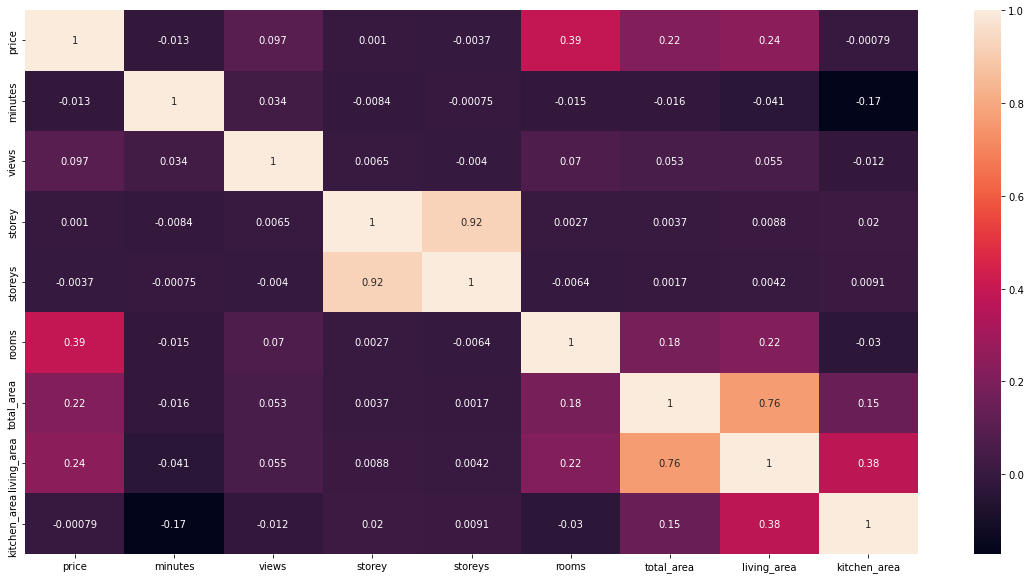

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(m1_num.corr(), annot=True)
plt.show()

# Correlation for week 3

In [95]:
m2_num = m2.select_dtypes(include=np.number)

In [96]:
m2_num.head(5)

,minutes,views,storey,storeys,rooms,total_area,living_area,kitchen_area,price
0,8,791,1,5,1,3.0,19.0,6.0,9.90
1,10,897,3,5,3,71.0,56.0,9.0,21.95
2,0,487,2,5,2,35.0,21.0,11.0,6.10
3,19,632,1,3,3,106.0,66.0,17.0,12.50
4,0,1972,13,14,2,70.0,42.0,14.0,16.50


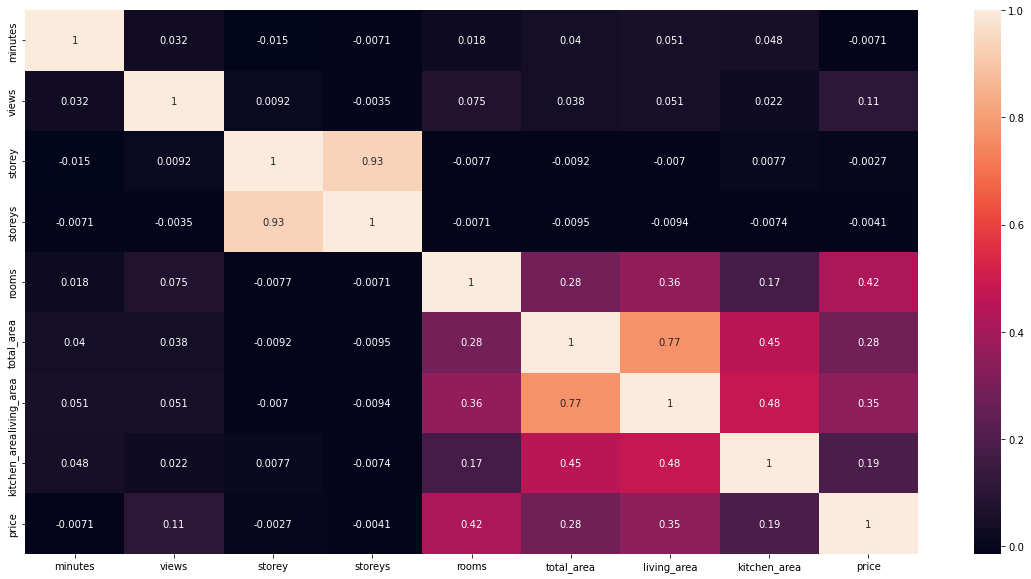

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(m2_num.corr(), annot=True)
plt.show()

# Linear Regression for week 1

From the correlation matrix, I decided to use 'rooms' and 'living_area' columns, as they show better correlation that the other columns

In [114]:
reg_week1 = LinearRegression()

In [115]:
m1_reg = m1_num[['living_area','rooms','price']]

In [116]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(m1_reg.loc[:,'living_area':'rooms'].values, 
                                                        m1_reg.loc[:,'price'],
                                                        test_size=0.33,
                                                        random_state=42)

In [117]:
reg_week1.fit(X_train1, y_train1)
y_pred = reg_week1.predict(X_test1)
print(f"The coefficient of determination ",r2_score(y_test1, y_pred))
print(f"mean squared error", mean_squared_error(y_test1, y_pred))

The coefficient of determination  0.23893085710645534
mean squared error 3212.253142053085


## With normalisation

In [123]:
m1_reg2 = m1_num[['living_area','rooms','price']]
m1_reg2['price'] = np.log(m1_reg2['price'])

/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_81690/1900869860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1_reg2['price'] = np.log(m1_reg2['price'])


In [124]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(m1_reg2.loc[:,'living_area':'rooms'].values, 
                                                        m1_reg2.loc[:,'price'],
                                                        test_size=0.33,
                                                        random_state=42)

In [125]:
reg_week2 = LinearRegression()

In [126]:
reg_week2.fit(X_train1, y_train1)
y_pred = reg_week2.predict(X_test1)
print(f"The coefficient of determination ",r2_score(y_test1, y_pred))
print(f"mean squared error", mean_squared_error(y_test1, y_pred))

The coefficient of determination  0.5004767008193909
mean squared error 0.3692917780662005


# Linear Regression for week 3

In [118]:
reg_week2 = LinearRegression()

In [119]:
m2_reg = m2_num[['living_area','rooms','price']]

In [120]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(m2_reg.loc[:,'living_area':'rooms'].values, 
                                                        m2_reg.loc[:,'price'],
                                                        test_size=0.33,
                                                        random_state=42)

In [121]:
reg_week2.fit(X_train1, y_train1)
y_pred = reg_week2.predict(X_test1)
print(f"The coefficient of determination ",r2_score(y_test1, y_pred))
print(f"mean squared error", mean_squared_error(y_test1, y_pred))

The coefficient of determination  0.18769756015817918
mean squared error 4617.52637975256


## With normalisation

In [127]:
reg_week2 = LinearRegression()

In [128]:
m2_reg2 = m2_num[['living_area','rooms','price']]
m2_reg2['price'] = np.log(m2_reg2['price'])

/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_81690/4256977431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2_reg2['price'] = np.log(m2_reg2['price'])


In [129]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(m2_reg2.loc[:,'living_area':'rooms'].values, 
                                                        m2_reg2.loc[:,'price'].values,
                                                        test_size=0.33,
                                                        random_state=42)

In [130]:
reg_week2.fit(X_train1, y_train1)
y_pred = reg_week2.predict(X_test1)
print(f"The coefficient of determination ",r2_score(y_test1, y_pred))
print(f"mean squared error", mean_squared_error(y_test1, y_pred))

The coefficient of determination  0.502077703513057
mean squared error 0.3292143782520783
